<a href="https://colab.research.google.com/github/kurealnum/dsrp-2025/blob/main/DSRP_Global_Debt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
I do not aspire or plan to utilize all 10 of these datasets in my final project. I just included them all in my initialization so I would have plenty of options.

Just something for me to keep in mind: after I choose a dataset, are there any other datasets that I could utilize to provide more context about my original dataset?

# Chosen research idea

Can central government debt levels of other countries predict central government debt levels of the U.S?

"Other countries" will represent three categories:
- All countries with data for a given time period
- Countries that the US frequently trades with (top 5 countries based on [this resource](https://www.trade.gov/data-visualization/tradestats-express-us-trade-products))
- Geographically neighboring countries (Canada and Mexico).

Chose central government debt because there were generally more data points

## Picking a research question

My research question should address an issue or a problem, outline various aspects of the study, and serve as a guiding point.

Remember that you can always change this as you go (as long as it's not a drastic change).

Be a skeptic and curious (how could this be misleading and what do I want to learn more about)

### Things to think about

What change/difference are you most interested in?

What result/finding would be most useful to someone interested in this topic?

### Things to look for/do
I want to look for/do...
- Gaps in data/understanding
- Populations/variables to focus on
- Being specific
- Being complex
- Categories to distinguish between
- Grouping data/variables

### Ways to ask a question

Compare: Is there a meaningful difference between 2 or more categorical variables, are there variations/patterns in time periods/regions
Classify: How well you can predict variables?

### Statement of purpose

Create a statement of purpose. The purpose of this study is to...
- Determine if how X
- Investigate X
- Classify X
- Predict X based on Y
- Some other way! These are just suggestions

# Installing packages

In [59]:
# We have to use python-calamine to load the (now deprecated) datasets below for some reason.
!pip install pandas
!pip install python-calamine
!pip install matplotlib
!pip install numpy
!pip install statsmodels
!pip install scikit-learn

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import datasets, model_selection
from sklearn.metrics import *
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.ticker as mtick

# Loading main datasets

## United States dataset

In [161]:
# US dataset
us_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/US_DebtDatabase.csv"
us_debt_database_df = pd.read_csv(us_debt_database_url)

In [162]:
us_debt_database_df.columns = us_debt_database_df.iloc[1]
us_debt_database_df.drop(0, axis=0, inplace=True)
us_debt_database_df.drop(1, axis=0, inplace=True)

## Canada dataset

In [163]:
canada_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/Canada_DebtDatabase.csv"
canada_debt_database_df = pd.read_csv(canada_debt_database_url)

In [164]:
# Set names of columns
canada_debt_database_df.columns = canada_debt_database_df.iloc[1]

# Drop first two rows
canada_debt_database_df.drop(0, axis=0, inplace=True)
canada_debt_database_df.drop(1, axis=0, inplace=True)

In [165]:
# Format names of columns
canada_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [166]:
canada_debt_database_df = canada_debt_database_df.astype(float)

## Mexico dataset

In [167]:
mexico_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/Mexico_DebtDatabase.csv"
mexico_debt_database_df = pd.read_csv(mexico_debt_database_url)

In [168]:
# Set names of columns
mexico_debt_database_df.columns = mexico_debt_database_df.iloc[1]

# Drop first two rows
mexico_debt_database_df.drop(0, axis=0, inplace=True)
mexico_debt_database_df.drop(1, axis=0, inplace=True)

In [169]:
# Format names of columns
mexico_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [170]:
mexico_debt_database_df = mexico_debt_database_df.astype(float)

I also want to consider other major trading partners, namely China and Germany (according to [this source](https://ustr.gov/countries-regions)).

## China (China, Mainland) dataset

In [171]:
china_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/ChinaMainland_DebtDatabase.csv"
china_debt_database_df = pd.read_csv(china_debt_database_url)

In [172]:
# Set names of columns
china_debt_database_df.columns = china_debt_database_df.iloc[1]

# Drop first two rows
china_debt_database_df.drop(0, axis=0, inplace=True)
china_debt_database_df.drop(1, axis=0, inplace=True)

In [173]:
# Format names of columns
china_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [174]:
china_debt_database_df = china_debt_database_df.astype(float)

## Germany dataset

In [175]:
germany_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/Germany_DebtDatabase.csv"
germany_debt_database_df = pd.read_csv(germany_debt_database_url)

In [176]:
# Set names of columns
germany_debt_database_df.columns = germany_debt_database_df.iloc[1]

# Drop first two rows
germany_debt_database_df.drop(0, axis=0, inplace=True)
germany_debt_database_df.drop(1, axis=0, inplace=True)

In [177]:
# Format names of columns
germany_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [178]:
germany_debt_database_df = germany_debt_database_df.astype(float)

## Central Government Debt dataset (all countries)

In [179]:
# The following is for public debt
# Central Government Debt
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")
central_govt_debt_df.shape

(177, 75)

In [180]:
central_govt_debt_df.replace("no data", pd.NA, inplace=True)
central_govt_debt_df.rename(columns={"Central Government Debt (Percent of GDP)": "Countries"}, inplace=True)

central_govt_debt_df.dropna(inplace=True)
central_govt_debt_df.iloc[:, 1:] = central_govt_debt_df.iloc[:, 1:].astype(str).astype(float)
central_govt_debt_df.index = central_govt_debt_df["Countries"]
central_govt_debt_df.drop("Countries", axis = 1, inplace=True)

# Exploratory data analysis

Let's start with `.head()`, `.info()`, `.describe()`, and `.corr()`.

## The Basics

In [81]:
us_debt_database_df.head()

1,Year,"Total private debt, \nall instruments\n(percent of GDP)","Total private debt, \nloans and debt securities\n(percent of GDP)","Household debt, all instruments\n(percent of GDP)","Household debt, loans and debt securities\n(percent of GDP)","Non-financial corporations debt, all instruments\n(percent of GDP)","Non-financial corporations debt, loans and debt securities\n(percent of GDP)",Public sector debt\n(percent of GDP),Nonfinancial public sector debt\n(percent of GDP),General government debt\n(percent of GDP),Central government debt\n(percent of GDP),Nominal gross domestic product\n(billions)
2,1950,75.83,55.31,25.48,24.80,50.34,30.51,NaN,NaN,83.13,78.20,301.78
3,1951,72.69,53.66,24.52,23.91,48.17,29.75,NaN,NaN,72.96,68.20,348.99
4,1952,88.24,56.56,26.60,25.98,61.64,30.58,NaN,NaN,72.53,66.34,368.03
5,1953,88.05,58.02,28.43,27.79,59.62,30.22,NaN,NaN,71.75,64.60,389.15
6,1954,106.06,62.57,31.54,30.86,74.52,31.71,NaN,NaN,73.57,64.96,390.28


In [82]:
us_debt_database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 2 to 75
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Year                                                                         74 non-null     object
 1   Total private debt, 
all instruments
(percent of GDP)                        74 non-null     object
 2   Total private debt, 
loans and debt securities
(percent of GDP)              74 non-null     object
 3   Household debt, all instruments
(percent of GDP)                             74 non-null     object
 4   Household debt, loans and debt securities
(percent of GDP)                   74 non-null     object
 5   Non-financial corporations debt, all instruments
(percent of GDP)            74 non-null     object
 6   Non-financial corporations debt, loans and debt secu

Public sector debt and nonfiancial public sector debt are completely null. Everything else has data.

With that, let's go ahead and remove those two columns.

In [83]:
us_debt_database_df.columns

Index(['Year', 'Total private debt, \nall instruments\n(percent of GDP)',
       'Total private debt, \nloans and debt securities\n(percent of GDP)',
       'Household debt, all instruments\n(percent of GDP)',
       'Household debt, loans and debt securities\n(percent of GDP)',
       'Non-financial corporations debt, all instruments\n(percent of GDP)',
       'Non-financial corporations debt, loans and debt securities\n(percent of GDP)',
       'Public sector debt\n(percent of GDP)',
       'Nonfinancial public sector debt\n(percent of GDP)',
       'General government debt\n(percent of GDP)',
       'Central government debt\n(percent of GDP)',
       'Nominal gross domestic product\n(billions)'],
      dtype='object', name=1)

In [84]:
# Rename columns to make our lives easier
us_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [85]:
us_debt_database_df.drop("Public sector debt", axis = 1, inplace=True)
us_debt_database_df.drop("Nonfinancial public sector debt", axis=1, inplace=True)
us_debt_database_df.reset_index(drop=True, inplace=True)

In [86]:
us_debt_database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Year                                                        74 non-null     object
 1   Total Private Debt, All Instruments                         74 non-null     object
 2   Total Private Debt, Loans and Debt Securities               74 non-null     object
 3   Household Debt, All Instruments                             74 non-null     object
 4   Household Debt, Loans and Debt Securities                   74 non-null     object
 5   Non-Financial Corporations Debt, All Instruments            74 non-null     object
 6   Non-Financial Corporations Debt, Loans and Debt Securities  74 non-null     object
 7   General Government Debt                                     74 non-null     object
 8   Central Gove

There we go!

The other interesting thing that `.info()` tells us is that all of our numeric values are treated as objects, not ints. Let's change that.

In [87]:
us_debt_database_df = us_debt_database_df.astype(float)

In [88]:
us_debt_database_df.describe()

,Year,"Total Private Debt, All Instruments","Total Private Debt, Loans and Debt Securities","Household Debt, All Instruments","Household Debt, Loans and Debt Securities","Non-Financial Corporations Debt, All Instruments","Non-Financial Corporations Debt, Loans and Debt Securities",General Government Debt,Central Government Debt,Nominal Gross Domestic Product (Billions)
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1986.500000,172.237838,115.475000,60.594730,59.284595,111.643649,56.191081,68.847568,54.685405,7447.523243
std,21.505813,40.509385,33.423377,20.095546,19.664633,22.407240,14.811533,23.021020,21.943376,7470.270145
min,1950.000000,72.690000,53.660000,24.520000,23.910000,48.170000,29.750000,41.110000,27.510000,301.780000
25%,1968.250000,147.465000,90.600000,46.002500,44.945000,101.847500,44.680000,51.267500,39.470000,952.012500
50%,1986.500000,167.310000,119.035000,58.375000,57.330000,108.180000,56.560000,63.890000,48.355000,4717.440000
75%,2004.750000,215.007500,150.562500,77.215000,75.460000,126.250000,66.567500,72.975000,64.870000,12833.695000
max,2023.000000,238.750000,170.860000,100.590000,98.740000,158.280000,86.330000,132.930000,116.880000,27720.730000


In [89]:
us_debt_database_df.corr()

,Year,"Total Private Debt, All Instruments","Total Private Debt, Loans and Debt Securities","Household Debt, All Instruments","Household Debt, Loans and Debt Securities","Non-Financial Corporations Debt, All Instruments","Non-Financial Corporations Debt, Loans and Debt Securities",General Government Debt,Central Government Debt,Nominal Gross Domestic Product (Billions)
Year,1.000000,0.938104,0.971111,0.918511,0.917798,0.872252,0.972887,0.651383,0.549997,0.937254
"Total Private Debt, All Instruments",0.938104,1.000000,0.967404,0.947594,0.947701,0.958073,0.924843,0.583333,0.459689,0.880299
"Total Private Debt, Loans and Debt Securities",0.971111,0.967404,1.000000,0.977306,0.977122,0.872495,0.959325,0.566803,0.442965,0.886044
"Household Debt, All Instruments",0.918511,0.947594,0.977306,1.000000,0.999958,0.816326,0.877810,0.520364,0.385812,0.834130
"Household Debt, Loans and Debt Securities",0.917798,0.947701,0.977122,0.999958,1.000000,0.816558,0.877338,0.518532,0.384102,0.833947
"Non-Financial Corporations Debt, All Instruments",0.872252,0.958073,0.872495,0.816326,0.816558,1.000000,0.884784,0.587917,0.485050,0.843413
"Non-Financial Corporations Debt, Loans and Debt Securities",0.972887,0.924843,0.959325,0.877810,0.877338,0.884784,1.000000,0.590604,0.489618,0.892241
General Government Debt,0.651383,0.583333,0.566803,0.520364,0.518532,0.587917,0.590604,1.000000,0.985608,0.835341
Central Government Debt,0.549997,0.459689,0.442965,0.385812,0.384102,0.485050,0.489618,0.985608,1.000000,0.766320
Nominal Gross Domestic Product (Billions),0.937254,0.880299,0.886044,0.834130,0.833947,0.843413,0.892241,0.835341,0.766320,1.000000


Now that we've gotten a brief overview of what our dataset looks like, let's analyze some of it.

We'll utilize a box plot first, but we're going to need to normalize our data. We'll try two methods of normalizing data.

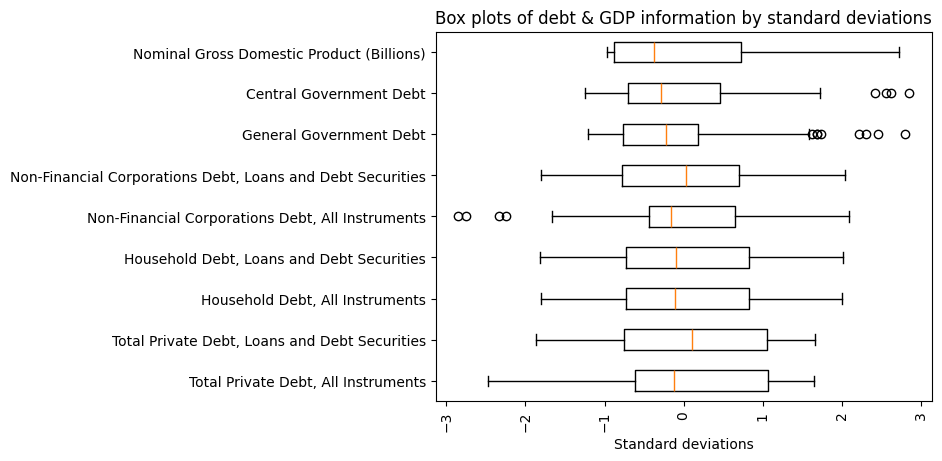

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(us_debt_database_df)
normalized_df = pd.DataFrame(scaled_data, columns=us_debt_database_df.columns).drop("Year", axis=1)

plt.boxplot(normalized_df, tick_labels=normalized_df.columns, orientation="horizontal")
plt.xticks(rotation=90)
plt.xlabel("Standard deviations")
plt.title("Box plots of debt & GDP information by standard deviations")
plt.show()

Our other "method" of normalizing data will be simply removing the column that causes us problems: nominal GDP.

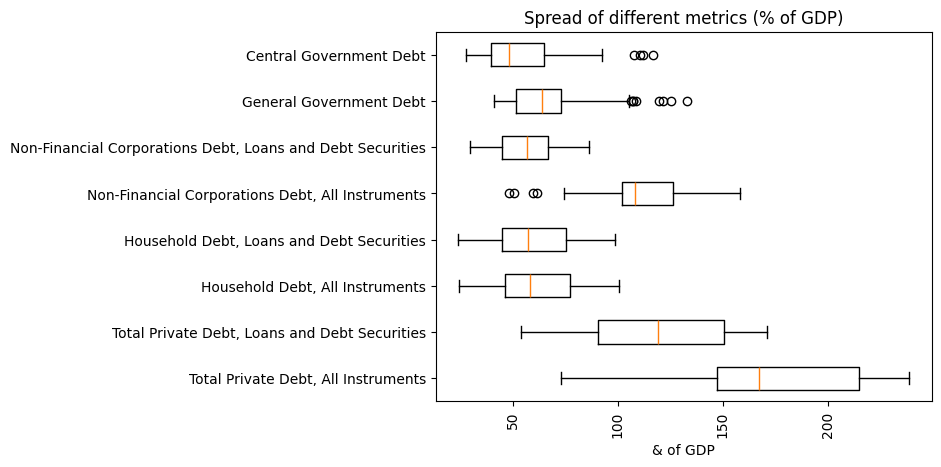

In [91]:
tmp_df = us_debt_database_df.drop(columns=["Year", "Nominal Gross Domestic Product (Billions)"])

plt.boxplot(tmp_df, tick_labels=tmp_df.columns, orientation="horizontal")
plt.xticks(rotation=90)
plt.xlabel("& of GDP")
plt.title("Spread of different metrics (% of GDP)")
plt.show()

## More exploratory data analysis

My research question asks if debt levels of neighboring countries can improve predictions of debt levels of the U.S. Looking at some correlations here would be quite useful. Since my research question references central government debt as an example, let's see if there's any correlation there.

In [92]:
cent_govt_debt_df = pd.DataFrame(
    {
        "Year": us_debt_database_df[
            "Year"
        ],
        "American Central Government Debt": us_debt_database_df[
            "Central Government Debt"
        ],
        "Canadian Central Government Debt": canada_debt_database_df[
            "Central Government Debt"
        ],
        "Mexican Central Government Debt": mexico_debt_database_df[
            "Central Government Debt"
        ],
    }
)

In [93]:
cent_govt_debt_df.corr()

,Year,American Central Government Debt,Canadian Central Government Debt,Mexican Central Government Debt
Year,1.000000,0.549997,-0.505387,0.763017
American Central Government Debt,0.549997,1.000000,-0.207800,0.481420
Canadian Central Government Debt,-0.505387,-0.207800,1.000000,0.129077
Mexican Central Government Debt,0.763017,0.481420,0.129077,1.000000


In [94]:
mexico_debt_database_df.head(70)

,Year,"Total Private Debt, All Instruments","Total Private Debt, Loans and Debt Securities","Household Debt, All Instruments","Household Debt, Loans and Debt Securities","Non-Financial Corporations Debt, All Instruments","Non-Financial Corporations Debt, Loans and Debt Securities",Public sector debt,Nonfinancial public sector debt,General Government Debt,Central Government Debt,Nominal Gross Domestic Product (Billions)
2,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.57,0.06
3,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.11,0.07
4,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.15,0.08
5,1953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.03,0.08
6,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.64,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2015.0,80.35,38.36,14.69,14.69,65.66,23.67,50.97,NaN,NaN,33.78,19228.61
68,2016.0,88.48,41.47,15.46,15.46,73.03,26.01,55.00,NaN,NaN,35.88,20758.79
69,2017.0,86.14,41.40,15.59,15.59,70.56,25.82,52.52,NaN,NaN,34.27,22536.21
70,2018.0,84.38,40.65,15.61,15.61,68.77,25.05,52.20,NaN,NaN,34.40,24176.67


There's not a strong correlation there, but let's graph it anyways.

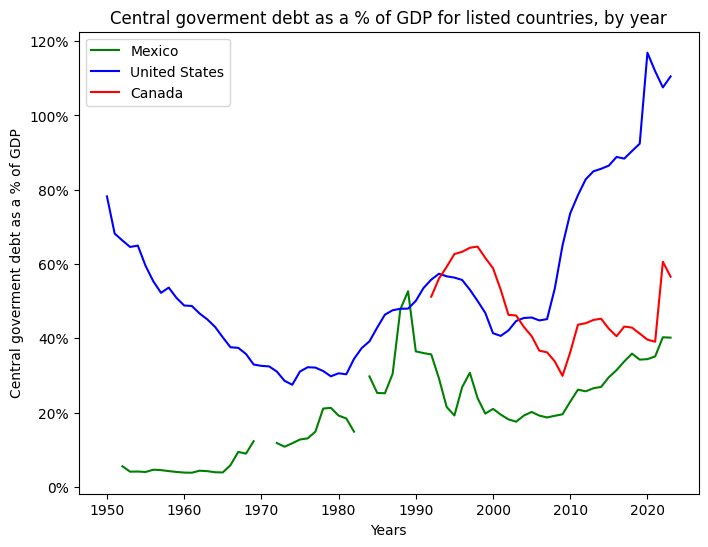

In [95]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(8,6))
ax = fig.subplots()
ax.yaxis.set_major_formatter(formatter=PercentFormatter())

plt.plot(cent_govt_debt_df["Year"], cent_govt_debt_df["Mexican Central Government Debt"], label="Mexico", color = "green")
plt.plot(cent_govt_debt_df["Year"], cent_govt_debt_df["American Central Government Debt"], label="United States", color = "blue")
plt.plot(cent_govt_debt_df["Year"], cent_govt_debt_df["Canadian Central Government Debt"], label="Canada", color = "red")
plt.xlabel("Years")
plt.ylabel("Central goverment debt as a % of GDP")
plt.title("Central goverment debt as a % of GDP for listed countries, by year")
plt.legend()
plt.show()

You'll notice that some data is cut off here. This simply represents areas where values are missing. We can view a graph without any missing values by only looking at values past the year 1992.

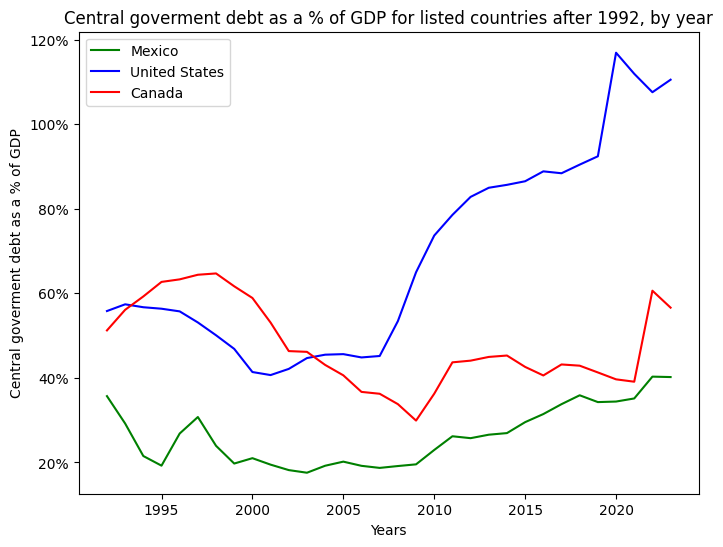

In [96]:
from matplotlib.ticker import PercentFormatter

cent_govt_debt_df_tmp = cent_govt_debt_df.drop(cent_govt_debt_df[cent_govt_debt_df["Year"] < 1992].index)

fig = plt.figure(figsize=(8,6))
ax = fig.subplots()
ax.yaxis.set_major_formatter(formatter=PercentFormatter())

plt.plot(cent_govt_debt_df_tmp["Year"], cent_govt_debt_df_tmp["Mexican Central Government Debt"], label="Mexico", color = "green")
plt.plot(cent_govt_debt_df_tmp["Year"], cent_govt_debt_df_tmp["American Central Government Debt"], label="United States", color = "blue")
plt.plot(cent_govt_debt_df_tmp["Year"], cent_govt_debt_df_tmp["Canadian Central Government Debt"], label="Canada", color = "red")
plt.xlabel("Years")
plt.ylabel("Central goverment debt as a % of GDP")
plt.title("Central goverment debt as a % of GDP for listed countries after 1992, by year")
plt.legend()
plt.show()

I only now realized that `corrwith()` existed, so the following cells utilizes that function to get correlations.

I may be able to utilize `corrwith()` row-wise to determine correlation over the years.

In [97]:
us_debt_database_df.corrwith(canada_debt_database_df)

,0
Year,1.000000
"Total Private Debt, All Instruments",0.653802
"Total Private Debt, Loans and Debt Securities",0.888811
"Household Debt, All Instruments",0.205801
"Household Debt, Loans and Debt Securities",0.726311
"Non-Financial Corporations Debt, All Instruments",0.798534
"Non-Financial Corporations Debt, Loans and Debt Securities",0.854109
General Government Debt,0.731270
Central Government Debt,-0.207800
Nominal Gross Domestic Product (Billions),0.995777


Excluding the GDP and Year columns, we can see that our 3 strongest correlations are with `Total Private Debt, Loans and Debt Securities`, `Non-Financial Corporations Debt, Loans and Debt Securities`, and `Non-Financial Corporations Debt, All Instruments`

In [98]:
us_debt_database_df.drop(["General Government Debt"], axis = 1).corrwith(mexico_debt_database_df.drop(["General Government Debt", "Nonfinancial public sector debt", "Public sector debt"], axis = 1))

,0
Year,1.000000
"Total Private Debt, All Instruments",0.035813
"Total Private Debt, Loans and Debt Securities",-0.244034
"Household Debt, All Instruments",-0.861424
"Household Debt, Loans and Debt Securities",-0.160661
"Non-Financial Corporations Debt, All Instruments",0.852314
"Non-Financial Corporations Debt, Loans and Debt Securities",-0.066938
Central Government Debt,0.481420
Nominal Gross Domestic Product (Billions),0.961485


Excluding the GDP and Year columns, we can see that our strongest correlations are with `Household Debt, All Instruments`, `Non-Financial Corporations Debt, All Instruments`, and `Central Government Debt`.

One very important thing to keep in mind here is the fact that neither Mexico nor Canada has complete data. Canada only has data past 1992, and Mexico is missing data in a few years in the 1900s.

Also note that we are only comparing 1 variable to another, for now. We could come back and check correlations for different variables, such as the correlation between `Houshold Debt, All instruments` in Mexico and `Central Government Debt` for the U.S.

## Utilizing corrwith()

In [99]:
canada_corr = us_debt_database_df.corrwith(canada_debt_database_df)
mexico_corr = us_debt_database_df.corrwith(mexico_debt_database_df)
china_corr = us_debt_database_df.corrwith(china_debt_database_df)
germany_corr = us_debt_database_df.corrwith(germany_debt_database_df)

corr_df = pd.DataFrame({"Canada": canada_corr, "Mexico": mexico_corr, "China": china_corr, "Germany": germany_corr})

corr_df.dropna(inplace=True)
corr_df.drop("Nominal Gross Domestic Product (Billions)", inplace=True)

corr_df

,Canada,Mexico,China,Germany
Year,1.000000,1.000000,1.000000,1.000000
"Total Private Debt, Loans and Debt Securities",0.888811,-0.244034,0.665418,0.890718
"Household Debt, Loans and Debt Securities",0.726311,-0.160661,-0.843298,0.698988
"Non-Financial Corporations Debt, Loans and Debt Securities",0.854109,-0.066938,0.713743,0.668992


This may give us a better look at what the best metric would be to investigate.

# Research questions

## Utilizing `Non-Financial Corporations Debt, All Instruments` with United States and its given countries

Can the statistic `Non-Financial Corporations Debt, All Instruments` from the given countries predit the debt level of the U.S.?

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


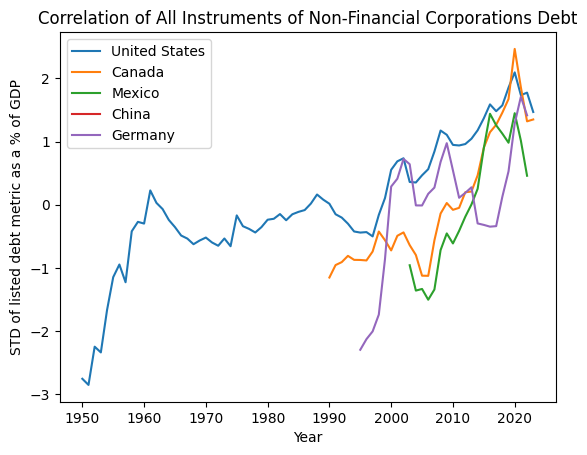

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
years = us_debt_database_df["Year"]

us_data = scaler.fit_transform(us_debt_database_df[["Non-Financial Corporations Debt, All Instruments"]])
canada_data = scaler.fit_transform(canada_debt_database_df[["Non-Financial Corporations Debt, All Instruments"]])
mexico_data = scaler.fit_transform(mexico_debt_database_df[["Non-Financial Corporations Debt, All Instruments"]])
china_data = scaler.fit_transform(china_debt_database_df[["Non-Financial Corporations Debt, All Instruments"]])
germany_data = scaler.fit_transform(germany_debt_database_df[["Non-Financial Corporations Debt, All Instruments"]])

plt.plot(years, us_data, label = "United States")
plt.plot(years, canada_data, label = "Canada")
plt.plot(years, mexico_data, label = "Mexico")
plt.plot(years, china_data, label = "China")
plt.plot(years, germany_data, label = "Germany")
plt.xlabel("Year")
plt.ylabel("STD of listed debt metric as a % of GDP")
plt.title("Correlation of All Instruments of Non-Financial Corporations Debt")
plt.legend()
plt.show()

There is a strong correlation here, but we should really only consider the data past 2003, as this is the only time when all 4 given countries have data points. However, this would only give us ~20 data points per country, so maybe this isn't a good metric to go with.

(Also, if you didn't notice, China doesn't even have any data points for this metric)

We can also run a T-Test here.

Null Hypothesis: The true difference between the `Non-Financial Corporations Debt, All Instruments` means in the US and Canada database is 0

Alternative Hypothesis: The true difference between the `Non-Financial Corporations Debt, All Instruments` means in the US and Canada database is different from 0

Threshold for rejecting the null hypothesis: p < 0.05

All that being said, I'm not sure that a T-test is completely applicable here.

In [101]:
us_data = us_debt_database_df[us_debt_database_df["Year"] > 1992][["Non-Financial Corporations Debt, All Instruments"]]
canada_data = canada_debt_database_df[canada_debt_database_df["Year"] > 1992][["Non-Financial Corporations Debt, All Instruments"]]

stats.ttest_rel(us_data, canada_data)

TtestResult(statistic=array([-3.00374462]), pvalue=array([0.00533942]), df=array([30]))

## Utilizing `Non-Financial Corporations Debt, Loans and Debt Securities` with United States and given countries

Can the statistic `Non-Financial Corporations Debt, Loans and Debt Securities` from the given countries predit the debt level of the U.S.?

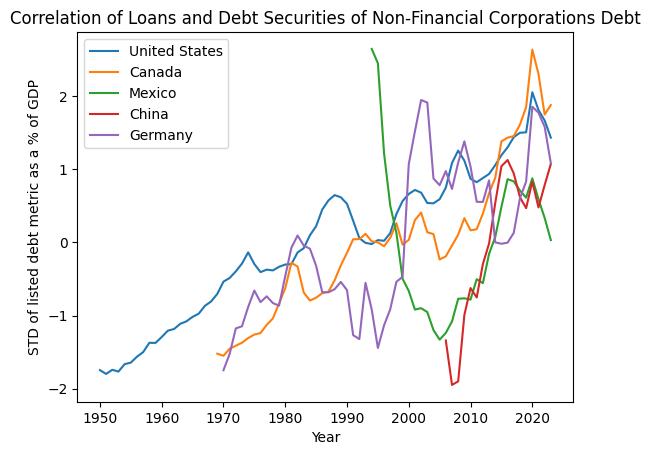

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
years = us_debt_database_df["Year"]
column = "Non-Financial Corporations Debt, Loans and Debt Securities"

us_data = scaler.fit_transform(us_debt_database_df[[column]])
canada_data = scaler.fit_transform(canada_debt_database_df[[column]])
mexico_data = scaler.fit_transform(mexico_debt_database_df[[column]])
china_data = scaler.fit_transform(china_debt_database_df[[column]])
germany_data = scaler.fit_transform(germany_debt_database_df[[column]])

plt.plot(years, us_data, label = "United States")
plt.plot(years, canada_data, label = "Canada")
plt.plot(years, mexico_data, label = "Mexico")
plt.plot(years, china_data, label = "China")
plt.plot(years, germany_data, label = "Germany")
plt.xlabel("Year")
plt.ylabel("STD of listed debt metric as a % of GDP")
plt.title("Correlation of Loans and Debt Securities of Non-Financial Corporations Debt")
plt.legend()
plt.show()

As seen in `corr_df`, there is a correlation here, but let's utilize a few machine learning models to see what kind of result we can get.

We'll need to remove any null rows *and* ensure that each feature is the same length.

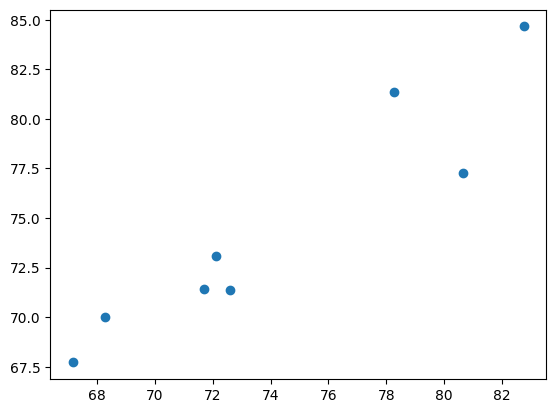

In [103]:
def remove_before_year(year: int, df: pd.DataFrame):
  return df[df["Year"] > year]

column = "Non-Financial Corporations Debt, Loans and Debt Securities"
features_cleaned = [remove_before_year(2005, df)[column] for df in [
    canada_debt_database_df,
    mexico_debt_database_df,
    china_debt_database_df,
    germany_debt_database_df
]]

features = pd.DataFrame({
    "Canada " + column: features_cleaned[0],
    "Mexico " + column: features_cleaned[1],
    "China " + column: features_cleaned[2],
    "Germany " + column: features_cleaned[3]
})
label = pd.DataFrame({"US " + column: remove_before_year(2005, us_debt_database_df)[column]})

# Using 0.4 since we have very limited data
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.4, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

plt.scatter(y_test, pred)
plt.show()

In [104]:
print('mean squared: ', mean_squared_error(y_test, pred))

print('r squared: ', r2_score(y_test, pred))

mean squared:  3.8055439882501583
r squared:  0.867312957600254


This model has EXTREMELY limited data, and thus should not be trusted. Based on `corr_df`, we're going to check out Total Private Debt next.

## Utilizing `Total Private Debt, Loans and Debt Securities` with United States and given countries

Can the statistic `Total Private Debt, Loans and Debt Securities` from the given countries predit the debt level of the U.S.?

In [105]:
column = "Total Private Debt, Loans and Debt Securities"
features_cleaned = [remove_before_year(1953, df)[column] for df in [
    canada_debt_database_df,
    germany_debt_database_df
]]

features = pd.DataFrame({
    "Canada " + column: features_cleaned[0],
    "Germany " + column: features_cleaned[1]
})

# Columns with year and Nominal GDP removed
for c in us_debt_database_df.columns[1:-1]:
  label = pd.DataFrame({"US " + column: remove_before_year(1953, us_debt_database_df)[c]})

  X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

  reg = LinearRegression()
  reg.fit(X_train, y_train)
  pred = reg.predict(X_test)

  print(c)
  print('mean squared: ', mean_squared_error(y_test, pred))
  print('r squared: ', r2_score(y_test, pred))
  print("\n")

Total Private Debt, All Instruments
mean squared:  210.63569844492804
r squared:  0.8266454787685533


Total Private Debt, Loans and Debt Securities
mean squared:  81.38973921280788
r squared:  0.9258290069170667


Household Debt, All Instruments
mean squared:  70.57753827013485
r squared:  0.8081091366076143


Household Debt, Loans and Debt Securities
mean squared:  68.29554296178641
r squared:  0.8063731187380512


Non-Financial Corporations Debt, All Instruments
mean squared:  75.84406225367539
r squared:  0.7435420539162265


Non-Financial Corporations Debt, Loans and Debt Securities
mean squared:  11.643740831748175
r squared:  0.9503954167038968


General Government Debt
mean squared:  56.92255680911825
r squared:  0.8430187730131009


Central Government Debt
mean squared:  69.24797862610858
r squared:  0.8089085423931719




It seems that this model actually predicts `Non-Financial Corporations Debt, Loans and Debt Securities` better than `Total Private Debt, Loans and Debt Securities`, even though that's what was used as input.

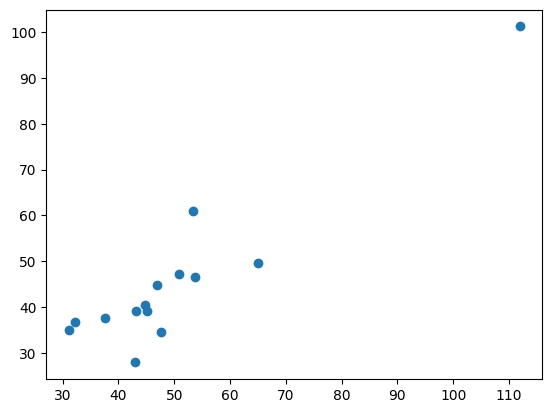

mean squared:  69.24833916493422
r squared:  0.8089075474776368


In [106]:
# Now with RidgeRegression...

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

plt.scatter(y_test, pred)
plt.show()

# Same resulsts???

print('mean squared: ', mean_squared_error(y_test, pred))

print('r squared: ', r2_score(y_test, pred))

## Can the `Central Government Debt` of all countries predict the `Central Government Debt` of the US?

"All countries" are those with data points for the entirety of the dataset. Any missing values were replaced with the mean of that countries Central Governement Debt level.

mean squared:  10.392765360384617
mean absolute:  2.5792385316580675
r squared:  0.9797229290765047


cross val scores mean: 0.9733796151943865


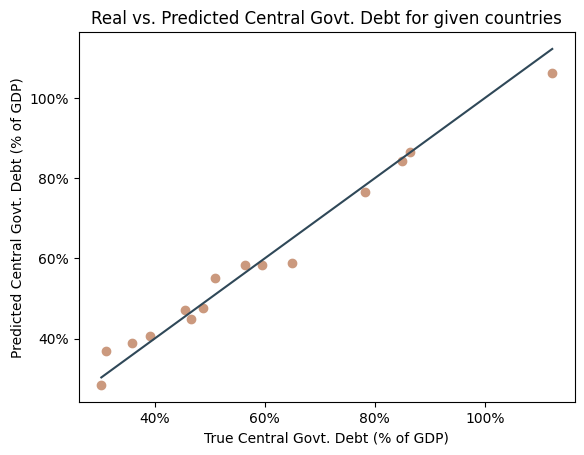

In [222]:
plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

features = central_govt_debt_df.T.drop("United States", axis = 1)

label = central_govt_debt_df.T[["United States"]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print('mean squared: ', mean_squared_error(y_test, pred))
print("mean absolute: ", mean_absolute_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))
print("\n")

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
print("cross val scores mean: " + str(scores.mean()))

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = '#2f4858', label='Correct Predictions')
plt.scatter(y_test, pred, color = "#cb997e")

plt.xlabel('True Central Govt. Debt (% of GDP)')
plt.ylabel('Predicted Central Govt. Debt (% of GDP)')
plt.title("Real vs. Predicted Central Govt. Debt for given countries")
plt.show()

In [149]:
# Thank you Vinayak Venugopal for this code

import statsmodels.api as sm
ols_model = sm.OLS(np.asarray(y_train, dtype=float), np.asarray(X_train, dtype=float)).fit()
print(ols_model.t_test(np.identity(len(ols_model.params))))
print(ols_model.summary())

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0221      0.025      0.874      0.387      -0.029       0.073
c1             0.1491      0.094      1.581      0.122      -0.042       0.340
c2             0.0813      0.174      0.466      0.644      -0.272       0.434
c3            -0.0907      0.092     -0.984      0.331      -0.277       0.096
c4             0.0594      0.033      1.807      0.079      -0.007       0.126
c5             0.0201      0.069      0.290      0.774      -0.121       0.161
c6            -0.4529      0.195     -2.318      0.026      -0.848      -0.057
c7            -0.0069      0.106     -0.065      0.948      -0.222       0.208
c8             0.1153      0.107      1.080      0.287      -0.101       0.331
c9             0.1074      0.118      0.914      0.3

mean squared:  0.02162344748229703
mean absolute:  0.11764904737416794
r squared:  0.9797229290765049


cross val scores mean: 0.9733796151943868


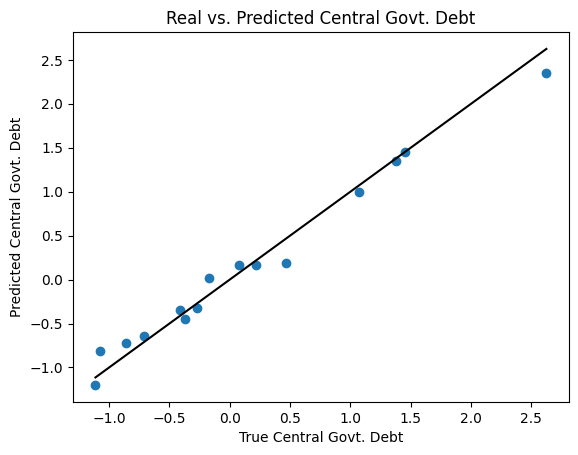

In [138]:
# With standardization...
scaler = StandardScaler()

features = scaler.fit_transform(central_govt_debt_df.T.drop("United States", axis = 1))

label = scaler.fit_transform(central_govt_debt_df.T[["United States"]])

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print('mean squared: ', mean_squared_error(y_test, pred))
print("mean absolute: ", mean_absolute_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))
print("\n")

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
print("cross val scores mean: " + str(scores.mean()))

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')
plt.scatter(y_test, pred)
plt.xlabel('True Central Govt. Debt')
plt.ylabel('Predicted Central Govt. Debt')
plt.title("Real vs. Predicted Central Govt. Debt")
plt.show()

mean squared:  325.9941219724917
mean absolute:  13.85653033435736
r squared:  0.47601868499102995


cross val scores mean: -5.700359661993383


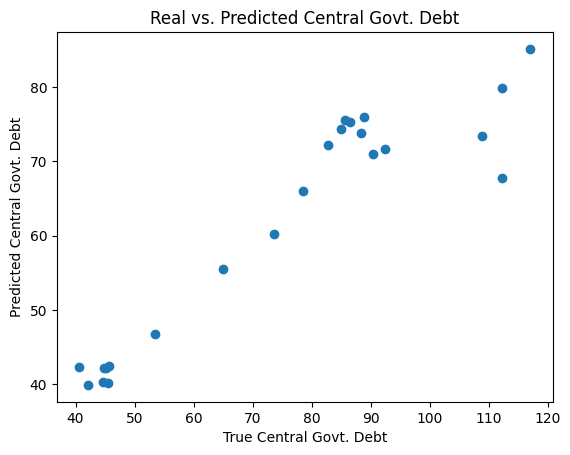

In [203]:
# Without shuffling...
features = central_govt_debt_df.T.drop("United States", axis = 1)

label = central_govt_debt_df.T[["United States"]]

# Note the extended test size. Especially highlight the fact that 0.35 is a cherry picked value.
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.3, shuffle = False)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print('mean squared: ', mean_squared_error(y_test, pred))
print("mean absolute: ", mean_absolute_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))
print("\n")

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
print("cross val scores mean: " + str(scores.mean()))

plt.scatter(y_test, pred)
plt.xlabel('True Central Govt. Debt')
plt.ylabel('Predicted Central Govt. Debt')
plt.title("Real vs. Predicted Central Govt. Debt")
plt.show()

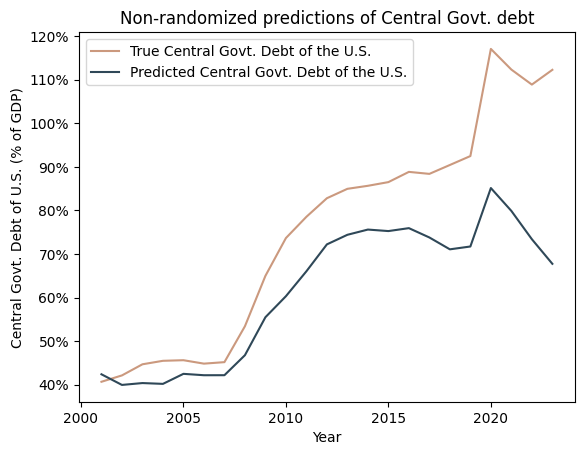

In [214]:
years = y_test.index

plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(years, y_test, label="True Central Govt. Debt of the U.S.", color = "#cb997e")
plt.plot(years, pred, label="Predicted Central Govt. Debt of the U.S.", color = "#2f4858")
plt.legend()
plt.xlabel("Year")
plt.title("Non-randomized predictions of Central Govt. debt")
plt.ylabel("Central Govt. Debt of U.S. (% of GDP)")
plt.show()



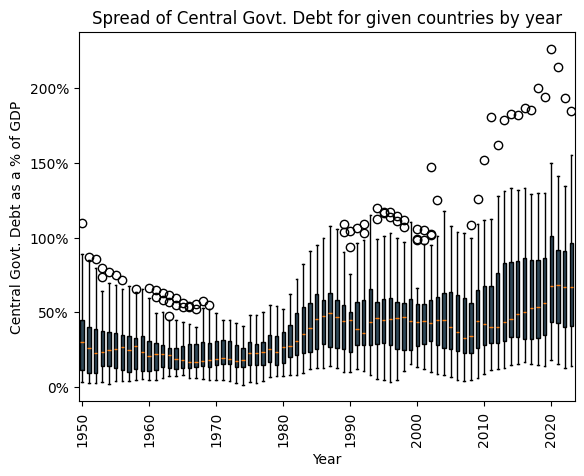

In [269]:
# Graph to display distribution
years = central_govt_debt_df.T.index

plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

years_spread = np.arange(1950, 2023, step=10, dtype=int)

# For poster quality
# plt.figure(dpi=1200, figsize = [16, 8])
bxplt = plt.boxplot(central_govt_debt_df, positions=years, patch_artist=True)

for patch in bxplt["boxes"]:
  patch.set_facecolor("#2f4858")

plt.xticks(ticks=years_spread, labels=years_spread, rotation=90)
plt.xlabel("Year")
plt.ylabel("Central Govt. Debt as a % of GDP")
plt.title("Spread of Central Govt. Debt for given countries by year")
plt.show()

## Can the `Central Government Debt` of countries that the US frequently trades with predict the `Central Government Debt` of the US?

Countries that the United States frequently trades with are classified as the top 5 countries listed under two-way trade in [this government resource](https://www.trade.gov/data-visualization/tradestats-express-us-trade-products). Countries that are geographically neighboring are excluded (Canada and Mexico), due to the fact that I use these countries later in my research. Additionally, countries that are not in this dataset are excluded (namely China and South Korea).

Thus, the "top 5 countries" are Germany, Japan, Taiwan, Vietnam, and the United Kingdom

mean squared:  8.01406675119379
mean absolute:  2.376195486720673
r squared:  0.9810979605221518
cross val scores mean: 0.9845337682782711


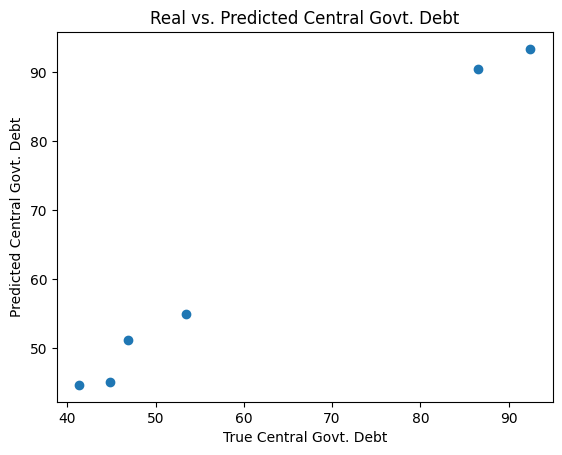

In [111]:
# Since none of these countries have data all the way from 1950, we need to get the dataset again.
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")

central_govt_debt_df.replace("no data", pd.NA, inplace=True)
central_govt_debt_df.rename(columns={"Central Government Debt (Percent of GDP)": "Countries"}, inplace=True)
central_govt_debt_df.index = central_govt_debt_df["Countries"]
central_govt_debt_df.drop("Countries", axis = 1, inplace=True)

top_5_countries = central_govt_debt_df.T[["Germany", "Japan", "Taiwan Province of China", "Vietnam", "United Kingdom", "United States"]].dropna()

features = top_5_countries.drop("United States", axis=1)

label = top_5_countries[["United States"]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print('mean squared: ', mean_squared_error(y_test, pred))
print("mean absolute: ", mean_absolute_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
print("cross val scores mean: " + str(scores.mean()))

plt.scatter(y_test, pred)
plt.xlabel('True Central Govt. Debt')
plt.ylabel('Predicted Central Govt. Debt')
plt.title("Real vs. Predicted Central Govt. Debt")
plt.show()

In [112]:
top_5_countries.corr()

Countries,Germany,Japan,Taiwan Province of China,Vietnam,United Kingdom,United States
Countries,,,,,,
Germany,1.000000,0.779178,0.838792,-0.797489,0.707829,0.507622
Japan,0.779178,1.000000,0.846380,-0.638494,0.905704,0.791011
Taiwan Province of China,0.838792,0.846380,1.000000,-0.832678,0.620755,0.409965
Vietnam,-0.797489,-0.638494,-0.832678,1.000000,-0.415500,-0.182064
United Kingdom,0.707829,0.905704,0.620755,-0.415500,1.000000,0.960165
United States,0.507622,0.791011,0.409965,-0.182064,0.960165,1.000000


Unfortunately, due to extremely limited data points, we can't confidently say that this test is completely accurate. However, according to the following graph, we can (not mathematically, in this case) say that debt generally trends upwards with our top 5 trading partners, again excluding Canada and Mexico.

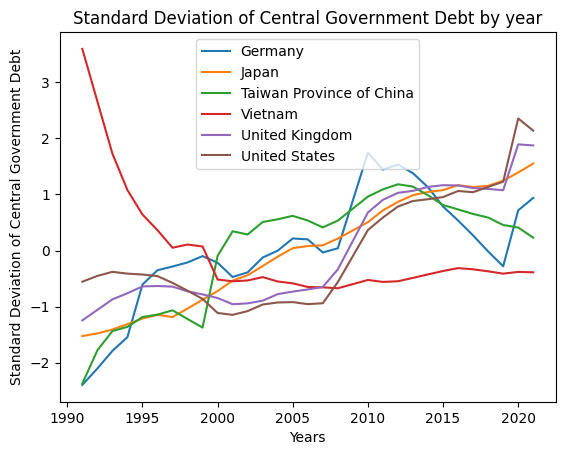

In [113]:
scaler = StandardScaler()

years = top_5_countries.index

for col in top_5_countries:
  plt.plot(years, scaler.fit_transform(top_5_countries[[col]]), label=col)

plt.legend()
plt.xlabel("Years")
plt.ylabel("Standard Deviation of Central Government Debt")
plt.title("Standard Deviation of Central Government Debt by year")
plt.show()

## Can the `Central Government Debt` of countries that the US geographically neighbors with predict the `Central Government Debt` of the US?

This is, of course, Canada and Mexico.

Central Government Debt
mean squared:  27.684555288737318
mean absolute:  3.3302345743667376
r squared:  0.9034215579108691
cross val scores mean: -0.27452112416800295


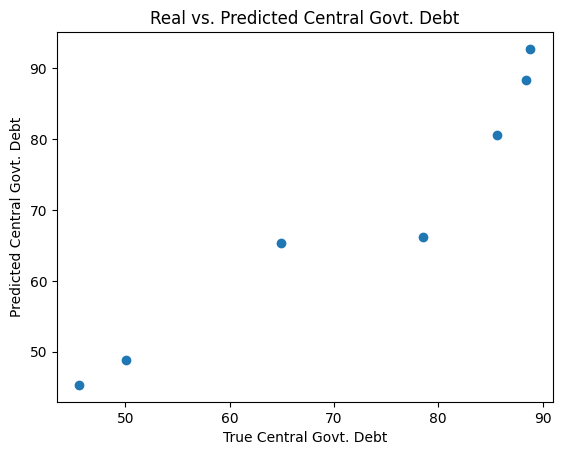

In [114]:
# Since none of these countries have data all the way from 1950, we need to get the dataset again.
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")

central_govt_debt_df.replace("no data", pd.NA, inplace=True)
central_govt_debt_df.rename(columns={"Central Government Debt (Percent of GDP)": "Countries"}, inplace=True)
central_govt_debt_df.index = central_govt_debt_df["Countries"]
central_govt_debt_df.drop("Countries", axis = 1, inplace=True)

canada_mexico_us = central_govt_debt_df.T[["Canada", "Mexico", "United States"]].dropna()

features = canada_mexico_us.drop("United States", axis=1)

label = canada_mexico_us[["United States"]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print(c)
print('mean squared: ', mean_squared_error(y_test, pred))
print("mean absolute: ", mean_absolute_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))

scores = model_selection.cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
print("cross val scores mean: " + str(scores.mean()))

plt.scatter(y_test, pred)
plt.xlabel('True Central Govt. Debt')
plt.ylabel('Predicted Central Govt. Debt')
plt.title("Real vs. Predicted Central Govt. Debt")
plt.show()

Again, the data that we have is extremely limited. The output of cross val scores mean is a bit weird, so let's take a deeper look at that.

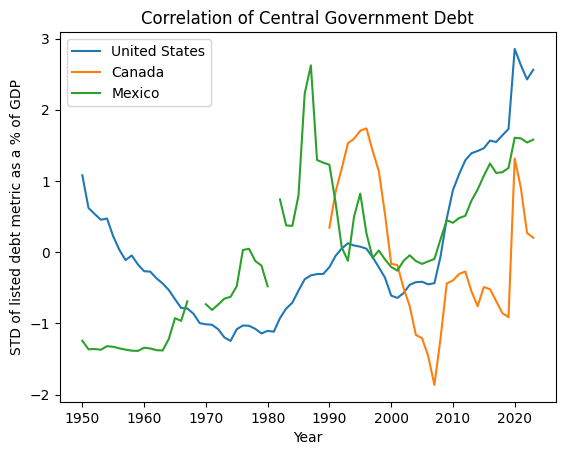

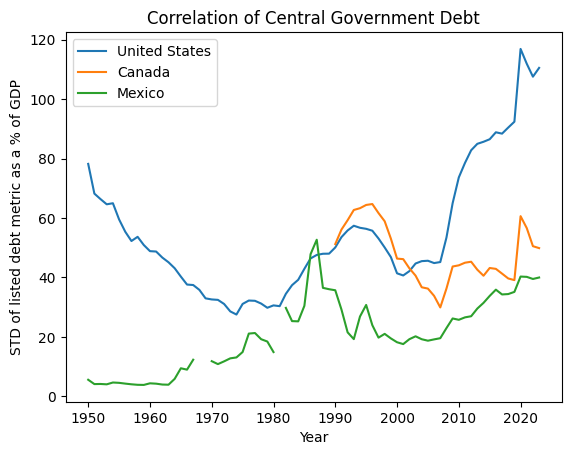

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
years = us_debt_database_df["Year"]

us_data = us_debt_database_df[["Central Government Debt"]]
canada_data = canada_debt_database_df[["Central Government Debt"]]
mexico_data = mexico_debt_database_df[["Central Government Debt"]]

us_data_scaled = scaler.fit_transform(us_data)
canada_data_scaled = scaler.fit_transform(canada_data)
mexico_data_scaled = scaler.fit_transform(mexico_data)

plt.plot(years, us_data_scaled, label = "United States")
plt.plot(years, canada_data_scaled, label = "Canada")
plt.plot(years, mexico_data_scaled, label = "Mexico")
plt.xlabel("Year")
plt.ylabel("STD of listed debt metric as a % of GDP")
plt.title("Correlation of Central Government Debt")
plt.legend()
plt.show()

plt.plot(years, us_data, label = "United States")
plt.plot(years, canada_data, label = "Canada")
plt.plot(years, mexico_data, label = "Mexico")
plt.xlabel("Year")
plt.ylabel("STD of listed debt metric as a % of GDP")
plt.title("Correlation of Central Government Debt")
plt.legend()
plt.show()

In [116]:
canada_mexico_us.corr()

Countries,Canada,Mexico,United States
Countries,,,
Canada,1.000000,0.129468,0.056282
Mexico,0.129468,1.000000,0.886925
United States,0.056282,0.886925,1.000000


# Practicality of this research

In other words, why? How could this help someone?

- If other countries central debt levels are suspected to increase by 10% in the next year, then perhaps we can expect that from the U.S (established a correlation).
- Make predictions off of other predictions (use predictions of Central Government Debt levels for other countries to predict the United States Central Government Debt levels)

# Improvements

- More data is absolutely needed. Only about an eigth of the given countries actually have data for the last 74 years. And also, while 74 years is a good amount of data, it's not great. Especially not when it comes to ML models.
- More research into correlations: with more time, I could research correlations with other metrics. This also ties into the issue of data: one of the main reasons that I chose the Central Government Debt metric is because it was the one that had the most data.

# Some notes

- Correlations by country aren't extremely high (`features.corr().mean().mean()` for all countries with data), but with linear regression using all of those countries as features, we actually get high accuracy.
- Debt is generally trending up -- what happens if it starts trending down? Will we lose accuracy?
- Govt. Debt is displayed and handled as a percent of GDP (give example).

# Poster/Slides
Slide presentation needs to be less than 5 minutes

Slide heading should be an idea

48” x 36” for posters

Utilize the example format

Big font sizes!

[Some good templates](https://www.posternerd.com/sciposters-templates)

- What do I want the viewer to immediately get from the poster?
- What is my goal?
- Who is my audience?
- What's the most interesting/compelling part of my work?
- What will be interesting/how can I make it interesting to EVERYONE?
- Highlight one important thing in every section
- Zoom in on images when done to ensure no grain/blur

## Title & Team Members
- Give away main title
- Include mentor (?)

## Introduction/Background
- Brief intro
- Enough information
- Does my project fill a gap (research question)

## Methods
- Keep this VERY short (broad audience)
- I made a...
- Images/graphics/schematics
- Don't show code, screenshots, raw data

## Results
- Highlight important results (plot time)
- Include figure captions
- Disclaimers
- ONLY include main findings

## Conclusion/discussion
- Can other types of debt predict other types of debt?
- What is THE most important takeaway
- What would I do next?
- Images are nice here

## References and Acknowledgements
- Include dataset source and any other sources
- Scholarship from TheCodingSchool
- Include peers (advised on expanding) and mentors

# Presenting

- Go from broad to narrow
- Focus on the conversation
- Adjust based off of interest, knowledge, etc.
- Be welcoming (hi can I tell you about my work, smile, wave, offer an overview)
- Don't trap people
- Focus on giving little tidbits and leaving something to be curious about
- Don't cut off what you're saying, but invite other people in
- Tell project as a STORY, not as a string of facts (and, but, therefore structure)
- We know X, but Y, therefore I did Z.
- Walk through variables
- Explain anything odd

## Scientific story
- Title
- Truth statement
- Problem
- Why is this interesting
- What have we tried/what could we do
- Why isn't the above not good enough
- What I've done and how
- Big picture (wrap it up)
- Think about what you want to say last

## Phrases

Avoid "as you can see", and use "I noticed", "you might notice", etc.

# TODO

- Consider other machine learning models (Bayesian Linear Regression, Partial Least Squares Regression, Principal Components Regression)
- T-Test/ANOVA test?